# Exoplanet Exploration Project

## Context
***
The Kepler Space Observatory is a NASA-build satellite that was launched in 2009. The telescope is dedicated to searching for exoplanets in star systems besides our own, with the ultimate goal of possibly finding other habitable planets besides our own. The original mission ended in 2013 due to mechanical failures, but the telescope has nevertheless been functional since 2014 on a "K2" extended mission.  
Kepler had verified 1284 new exoplanets as of May 2016. As of October 2017 there are over 3000 confirmed exoplanets total (using all detection methods, including ground-based ones). The telescope is still active and continues to collect new data on its extended mission.

## Content
***
This dataset is a cumulative record of all observed Kepler "objects of interest" — basically, all of the approximately 10,000 exoplanet candidates Kepler has taken observations on.  Highlightable columns of note are:

- kepoi_name: A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis
- kepler_name: [These names] are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.
- koi_disposition: The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.
- koi_pdisposition: The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.
- koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('./cumulative.csv')
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# Related variables in the study
# Disposition [ koi-disposition]
# Distance Over Radius [koi_dor]
# Stellar Equilibirum Temperature [Koi-teq]
# Period [koi_period]
# Depth [koi_depth]
# Insolation/Earth Flux [ koi_insol]
# Stellar Effective Temperature [koi_steff]
# log10(stellar surface Gravity) [koi_slogg]
# Duration [koi_duration]
# Planetary Radius [koi_prad]
# Number of Transits [koi_num_transits]
# Stellar Radius [koi_srad]

In [4]:
data["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [5]:
data["koi_pdisposition"].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [6]:
c = list(data.columns)
c

['rowid',
 'kepid',
 'kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [7]:
# Drop all the unnecessary variables
data = data[['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition',
            'koi_score', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

In [8]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509


In [9]:
# Create an empty column to store the result
data['result'] = ''

In [10]:
# Define the positive, negative, and false positive from disposition and pdisposition columns
for i in range(len(data)):
    if data.koi_disposition[i] == 'CONFIRMED' and data.koi_pdisposition[i] == 'CANDIDATE':
        data.result[i] = 'POSITIVE'
    elif data.koi_disposition[i] == 'CANDIDATE' and data.koi_pdisposition[i] == 'CANDIDATE':
        data.result[i] = 'POSITIVE'
    elif data.koi_disposition[i] == 'CONFIRMED' and data.koi_pdisposition[i] == 'FALSE POSITIVE':
        data.result[i] = 'FALSE POSITIVE'
    elif data.koi_disposition[i] == 'CANDIDATE' and data.koi_pdisposition[i] == 'FALSE POSITIVE':
        data.result[i] = 'FALSE POSITIVE'
    else:
        data.result[i] = 'NEGATIVE'

print(data['result'])
    

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

0       POSITIVE
1       POSITIVE
2       NEGATIVE
3       NEGATIVE
4       POSITIVE
          ...   
9559    NEGATIVE
9560    NEGATIVE
9561    POSITIVE
9562    NEGATIVE
9563    NEGATIVE
Name: result, Length: 9564, dtype: object


In [11]:
# Count the results
data['result'].value_counts()

NEGATIVE          5023
POSITIVE          4496
FALSE POSITIVE      45
Name: result, dtype: int64

In [12]:
# Factorize the results to Negative:[1], Positive:[0], and False Positive:[2]
data['res'], uniques = pd.factorize(data.result)

In [13]:
# Compare the counts with the result column
data['res'].value_counts()

1    5023
0    4496
2      45
Name: res, dtype: int64

In [14]:
# Check for total missing value in each column
data.isna().sum()

kepid                  0
kepoi_name             0
kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_score           1510
koi_period             0
koi_time0bk            0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_steff            363
koi_slogg            363
koi_srad             363
koi_kepmag             1
result                 0
res                    0
dtype: int64

In [15]:
# Drop the rows with missing value in 'koi_prad', which has represent the key variables in the study
data = data.dropna(subset=['koi_prad'])

In [16]:
# Check for missing value again after dropping the missing value rows
data.isna().sum()

kepid                  0
kepoi_name             0
kepler_name         6908
koi_disposition        0
koi_pdisposition       0
koi_score           1206
koi_period             0
koi_time0bk            0
koi_impact             0
koi_duration           0
koi_depth              0
koi_prad               0
koi_teq                0
koi_insol              0
koi_steff              0
koi_slogg              0
koi_srad               0
koi_kepmag             1
result                 0
res                    0
dtype: int64

In [17]:
# Check the count of the result column after dropping the missing value rows
data['res'].value_counts()

1    4724
0    4433
2      44
Name: res, dtype: int64

# Classification Methods
- Decision Tree
- Nearest Neighbors (KNN)
- Logistic Regression
- Support Vector Machine

# Decision Tree

In [18]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [19]:
# Use Pair Plot to visualize the correlation between the variables in the study
pairplot = data[['res', 'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']]

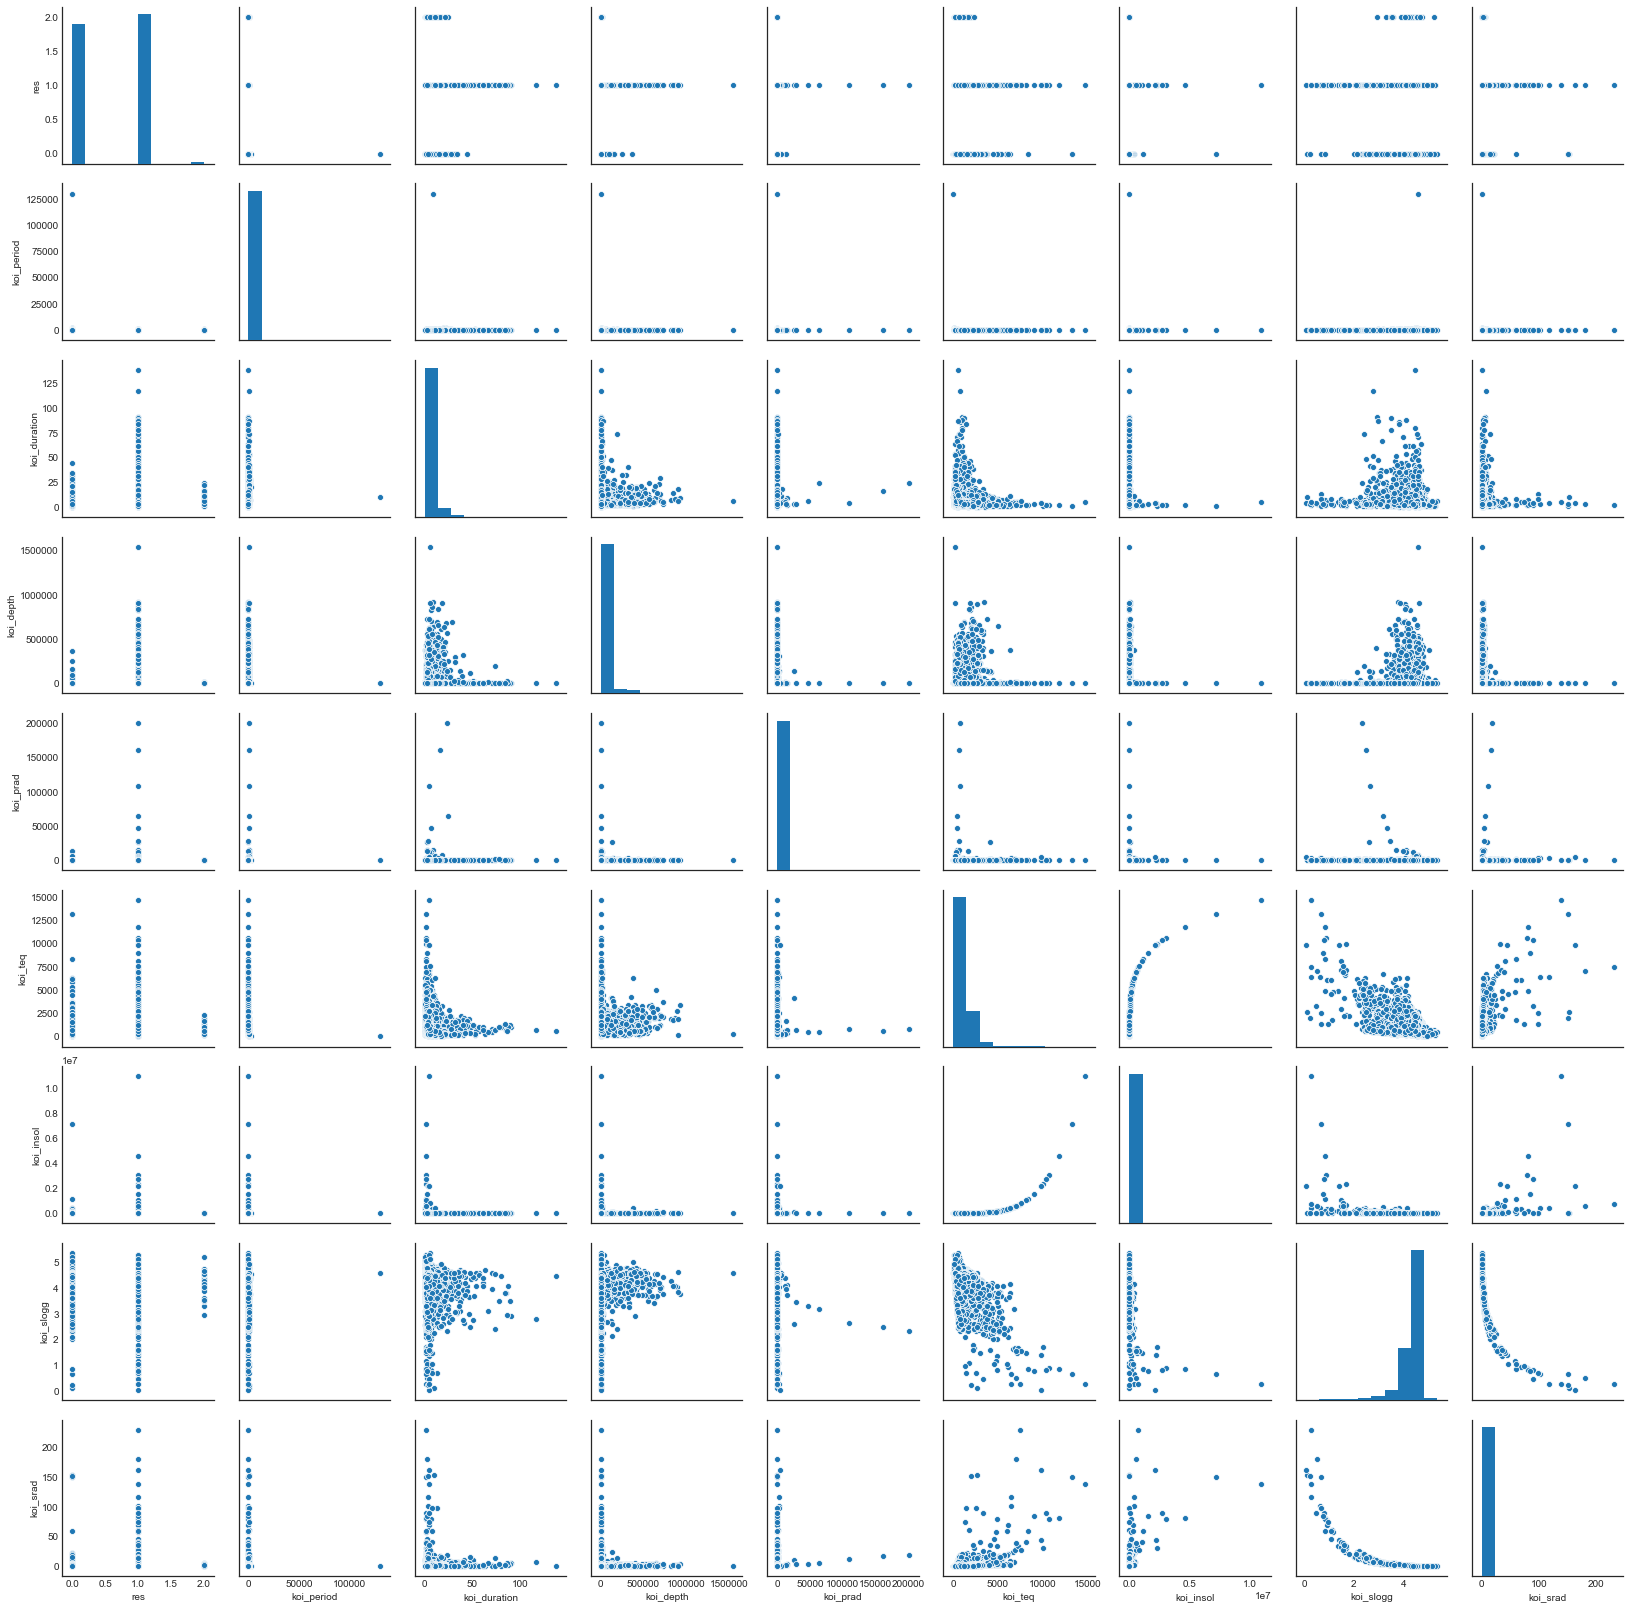

In [20]:
plot = sns.pairplot(pairplot)

In [21]:
# Define the independent variables (X) and dependent variable (y) for the tree model
X = data[['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']].as_matrix()
y = data.res.as_matrix()

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Use train_test_split() function divide the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [23]:
# Decision Tree Regressor Model
regr = DecisionTreeRegressor(max_leaf_nodes=5)
result = regr.fit(X, y)

[Text(200.88,195.696,'X[3] <= 14.23\nmse = 0.259\nsamples = 9201\nvalue = 0.523'),
 Text(133.92,152.208,'X[0] <= 1.895\nmse = 0.249\nsamples = 6860\nvalue = 0.386'),
 Text(66.96,108.72,'mse = 0.19\nsamples = 1151\nvalue = 0.765'),
 Text(200.88,108.72,'X[0] <= 180.565\nmse = 0.226\nsamples = 5709\nvalue = 0.31'),
 Text(133.92,65.232,'X[1] <= 14.499\nmse = 0.197\nsamples = 4809\nvalue = 0.244'),
 Text(66.96,21.744,'mse = 0.187\nsamples = 4659\nvalue = 0.227'),
 Text(200.88,21.744,'mse = 0.181\nsamples = 150\nvalue = 0.787'),
 Text(267.84,65.232,'mse = 0.237\nsamples = 900\nvalue = 0.662'),
 Text(267.84,152.208,'mse = 0.074\nsamples = 2341\nvalue = 0.923')]

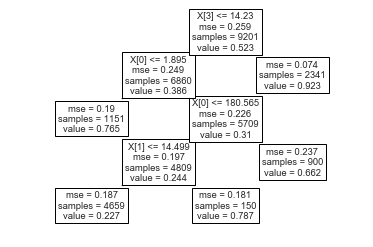

In [24]:
# Plot the Decision Trees diagram
tree.plot_tree(regr.fit(X, y))

In [25]:
y_pred = regr.predict(X)

In [26]:
# Print the predicted value compare to he actual
report = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
print(report)

      Actual  Predicted
0          0   0.226873
1          0   0.226873
2          1   0.923110
3          1   0.923110
4          0   0.226873
...      ...        ...
9196       1   0.226873
9197       1   0.923110
9198       0   0.764553
9199       1   0.764553
9200       1   0.226873

[9201 rows x 2 columns]


In [27]:
# Print the Mean Error Measures
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.3120328248314145
Mean Squared Error: 0.16357329961607014
Root Mean Squared Error: 0.4044419607509465


Text(0,0.5,'Actual')

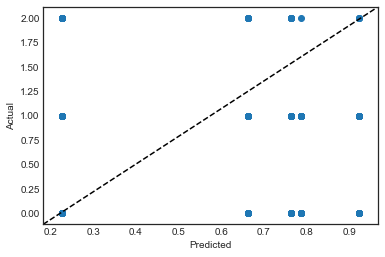

In [28]:
# Plot the prediction against the True
plt.scatter(y_pred, y, label='Prediction')
plt.plot([0,1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
# Decision Tree Classifier Model
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
# Check the classification report for accuracy rate
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4433
           1       0.83      0.79      0.81      4724
           2       0.00      0.00      0.00        44

    accuracy                           0.81      9201
   macro avg       0.54      0.54      0.54      9201
weighted avg       0.81      0.81      0.81      9201



C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
# Print the Mean Error Measures
print('Mean Absolute Error:', metrics.mean_absolute_error(y, clf.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, clf.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, clf.predict(X))))

Mean Absolute Error: 0.19432670361917184
Mean Squared Error: 0.20149983697424192
Root Mean Squared Error: 0.4488873321605789


[Text(171.884,199.32,'X[3] <= 14.23\ngini = 0.504\nsamples = 9201\nvalue = [4433, 4724, 44]'),
 Text(95.6571,163.08,'X[0] <= 2.253\ngini = 0.476\nsamples = 6860\nvalue = [4250, 2569, 41]'),
 Text(47.8286,126.84,'X[1] <= 2.096\ngini = 0.399\nsamples = 1304\nvalue = [350, 948, 6]'),
 Text(23.9143,90.6,'X[5] <= 3124.67\ngini = 0.493\nsamples = 683\nvalue = [279, 398, 6]'),
 Text(11.9571,54.36,'X[5] <= 571.945\ngini = 0.509\nsamples = 433\nvalue = [228, 200, 5]'),
 Text(5.97857,18.12,'gini = 0.421\nsamples = 94\nvalue = [67, 25, 2]'),
 Text(17.9357,18.12,'gini = 0.508\nsamples = 339\nvalue = [161, 175, 3]'),
 Text(35.8714,54.36,'X[2] <= 23.0\ngini = 0.331\nsamples = 250\nvalue = [51, 198, 1]'),
 Text(29.8929,18.12,'gini = 0.494\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(41.85,18.12,'gini = 0.316\nsamples = 241\nvalue = [46, 194, 1]'),
 Text(71.7429,90.6,'X[0] <= 1.438\ngini = 0.203\nsamples = 621\nvalue = [71, 550, 0]'),
 Text(59.7857,54.36,'X[7] <= 0.112\ngini = 0.095\nsamples = 422\nvalue 

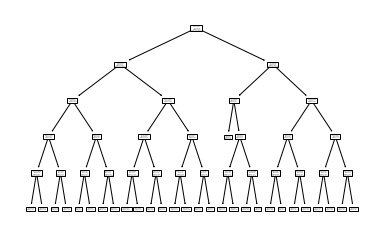

In [32]:
# Plot the decision tree diagram
tree.plot_tree(clf.fit(X, y))

In [33]:
# Compare the predicted results and actual results
cm = pd.DataFrame(confusion_matrix(y, clf.predict(X)).T, index=['Negative', 'Positive', 'False Positive'],
                 columns=['Negative', 'Positive', 'False Positive'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,Negative,Positive,False Positive
Predicted,,,
Negative,3700,978,33
Positive,733,3746,11
False Positive,0,0,0


# K Nearest Neighbor

In [34]:
# Dependencies for KNN model
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [35]:
# Spliting the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [36]:
# Scaling the independent variables for analysis
X_scaler = StandardScaler().fit(X.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.693
k: 3, Train/Test Score: 0.839/0.712
k: 5, Train/Test Score: 0.806/0.731
k: 7, Train/Test Score: 0.790/0.742
k: 9, Train/Test Score: 0.779/0.751
k: 11, Train/Test Score: 0.772/0.758
k: 13, Train/Test Score: 0.767/0.761
k: 15, Train/Test Score: 0.770/0.764
k: 17, Train/Test Score: 0.766/0.763
k: 19, Train/Test Score: 0.767/0.761


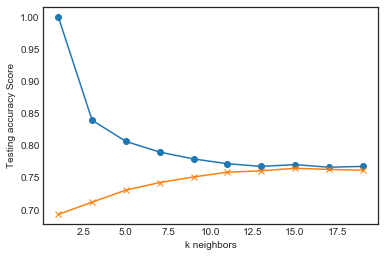

In [37]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.751


In [39]:
# Print the classifiation report checking the accuracy rate of the model
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1109
           1       0.78      0.73      0.75      1181
           2       0.00      0.00      0.00        11

    accuracy                           0.75      2301
   macro avg       0.50      0.50      0.50      2301
weighted avg       0.75      0.75      0.75      2301



C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression Model

In [40]:
# Dependencies for Logistic Regression Model
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
# Drop the False Positive values in the data for only binary analysis
data_2 = data.loc[data.res < 2]
data_2.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag,result,res
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347,POSITIVE,0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347,POSITIVE,0
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436,NEGATIVE,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597,NEGATIVE,1
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509,POSITIVE,0


In [42]:
# Create the dependent and independent variables
X_2 = data_2[['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']].as_matrix()
y_2 = data_2.res.as_matrix()

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# Spliting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, random_state=42, stratify=y_2)

In [44]:
# Logistic Regression Model
classifier = LogisticRegression()
classifier.fit(X2_train, y2_train)

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Print the training score and testing score
print(f"Training Data Score: {classifier.score(X2_train, y2_train)}")
print(f"Testing Data Score: {classifier.score(X2_test, y2_test)}")

Training Data Score: 0.5159458278724334
Testing Data Score: 0.5157205240174673


In [46]:
# Check accuracy rate of the model in classification report
print(classification_report(y2_test, classifier.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1109
           1       0.52      1.00      0.68      1181

    accuracy                           0.52      2290
   macro avg       0.26      0.50      0.34      2290
weighted avg       0.27      0.52      0.35      2290



C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# Compare the predicted values to the test data set
predictions = classifier.predict(X2_test)
pd.DataFrame({"Prediction": predictions, "Actual": y2_test})

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2285,1,1
2286,1,0
2287,1,0
2288,1,0


# Support Vector Machine

In [48]:
# Dependencies for SVM model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [49]:
# Support Vector Machine Linear Classifier
model = SVC(kernel='linear')

In [50]:
# Fitting the data into the model
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
# Save the prediction by the test data
predictions = model.predict(X_test_scaled)

In [52]:
# Check accuracy rate of  the model
print(classification_report(y_test, predictions,
                           target_names=['Negative', 'Positive', 'False Positive']))

                precision    recall  f1-score   support

      Negative       0.56      0.98      0.71      1109
      Positive       0.94      0.28      0.43      1181
False Positive       0.00      0.00      0.00        11

      accuracy                           0.62      2301
     macro avg       0.50      0.42      0.38      2301
  weighted avg       0.75      0.62      0.56      2301



C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Check the score of the dependent variable using the decision function
y_score = model.decision_function(X_train)
print(y_score)

[[-0.33330438  2.33330437  1.23863386]
 [-0.3333252   2.3333252   1.31188091]
 [-0.33330664  2.33330663  1.25375937]
 ...
 [-0.33329748  2.33329747  1.22671466]
 [-0.33330172  2.33330171  1.2345184 ]
 [-0.33333239  2.33333239  1.30062032]]


In [54]:
# Compare the predicted results to the training data
cm = confusion_matrix(y_train, model.predict(X_train_scaled))
cm_df = pd.DataFrame(cm.T, index=model.classes_, columns=model.classes_)
cm_df.index.name = 'Prediction'
cm_df.columns.name = 'True'
print(cm_df)

True           0     1   2
Prediction                
0           3247  2536  31
1             77  1007   2
2              0     0   0


In [55]:
# Compare the predicted results to the testing data
cm = confusion_matrix(y_test, model.predict(X_test_scaled))
cm_df = pd.DataFrame(cm.T, index=model.classes_, columns=model.classes_)
cm_df.index.name = 'Prediction'
cm_df.columns.name = 'True'
print(cm_df)

True           0    1   2
Prediction               
0           1089  853  11
1             20  328   0
2              0    0   0
